In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
path = '../data/bikeshare/'
data_files = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
              '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

In [3]:
data_df_list = []
for file in data_files:
    full_path = os.path.join(path, file)
    data_df = pd.read_csv(full_path)
    data_df_list.append(data_df)
all_df = pd.concat(data_df_list, axis=0)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758207 entries, 0 to 815369
Data columns (total 9 columns):
Duration (ms)           int64
Start date              object
End date                object
Start station number    object
Start station           object
End station number      object
End station             object
Bike number             object
Member type             object
dtypes: int64(1), object(8)
memory usage: 286.7+ MB


In [17]:
mem_dur_min = all_df['Duration (ms)'][all_df['Member type']=='Member']/1000/60
cas_dur_min = all_df['Duration (ms)'][all_df['Member type']=='Casual']/1000/60

In [18]:
hist_range = (0, 180) #只考虑骑行时间在180min以内的用户数量
n_bins = 12

In [19]:
m_duration_hist, m_bin_edges = np.histogram(mem_dur_min, range=hist_range, bins=n_bins)
# np.histogram() 返回2个值，一个是直方图本身，一个是分组边界，不输出边界也可以 
c_duration_hist, c_bin_edges = np.histogram(cas_dur_min, range=hist_range, bins=n_bins)
print('会员直方图统计信息：{}, 直方图分组边界:{}'.format(m_duration_hist, m_bin_edges))
print('非会员直方图统计信息：{}, 直方图分组边界:{}'.format(c_duration_hist, c_bin_edges))

会员直方图统计信息：[2063276  628882   56364   13624    4997    2702    1552     997     695
     472     368     287], 直方图分组边界:[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180.]
非会员直方图统计信息：[244526 371343 132917  68430  44607  33411  23362  16571  11690   8263
   5903   4557], 直方图分组边界:[  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180.]


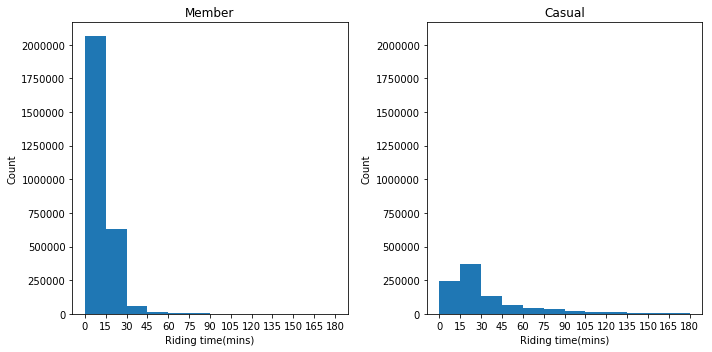

In [21]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

# 会员直方图
ax1.hist(mem_dur_min, range=hist_range, bins=n_bins)
ax1.set_xticks(range(0, 181, 15))
ax1.set_title('Member')
ax1.set_ylabel('Count')
ax1.set_xlabel('Riding time(mins)')

# 非会员直方图
ax2.hist(cas_dur_min, range=hist_range, bins=n_bins)
ax2.set_xticks(range(0, 181, 15))
ax2.set_title('Casual')
ax2.set_ylabel('Count')
ax2.set_xlabel('Riding time(mins)')


plt.tight_layout()
plt.show()

**显然，scatter不如Histogram表达效果好**

In [35]:
plt.scatter?

In [26]:
mem_dur_min.index

Int64Index([     0,      6,      7,      8,      9,     10,     11,     14,
                15,     16,
            ...
            815359, 815360, 815361, 815362, 815363, 815364, 815365, 815367,
            815368, 815369],
           dtype='int64', length=2776393)

In [24]:
mem_dur_min.values

array([ 3.69723333,  7.88895   ,  3.33461667, ...,  6.55443333,
       21.99131667,  4.44985   ])

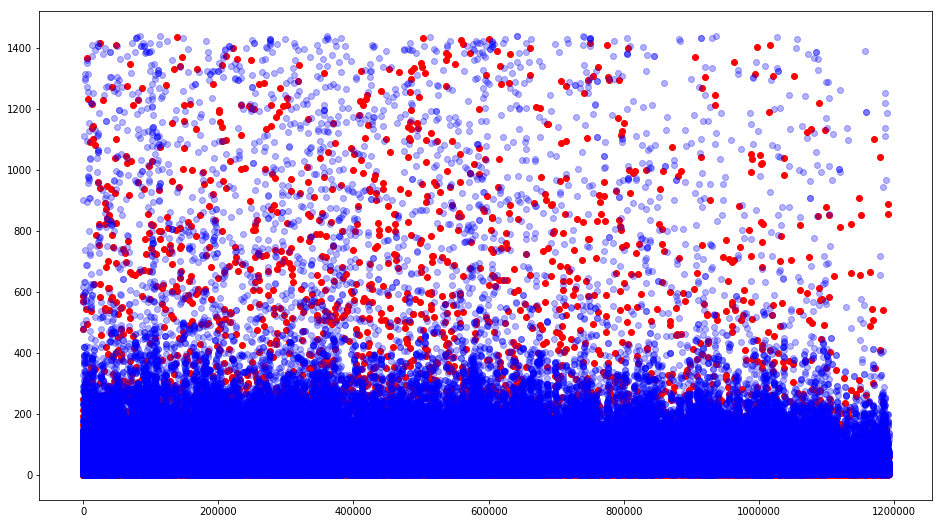

In [36]:
plt.figure(figsize=(16,9))
plt.scatter(mem_dur_min.index, mem_dur_min.values, c='r', label='member')
plt.scatter(cas_dur_min.index, cas_dur_min.values, c='b', label='casual', alpha=0.3)

```python
# 数据源同上

"""
    明确任务：统计不同用户骑行时间的直方图
"""
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = './data/bikeshare/'
data_filenames = ['2017-q1_trip_history_data.csv', '2017-q2_trip_history_data.csv',
                  '2017-q3_trip_history_data.csv', '2017-q4_trip_history_data.csv']

# 结果保存路径
output_path = './output'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# 直方图参数
hist_range = (0, 180)
n_bins = 12


def collect_and_process_data():
    """
        Step 1+2: 数据获取，数据处理
    """
    year_duration_member_type_list = []
    for data_filename in data_filenames:
        data_file = os.path.join(data_path, data_filename)
        data_arr = np.loadtxt(data_file, delimiter=',', dtype='str', skiprows=1)

        # 去掉双引号
        # 骑行时间
        duration_col = np.core.defchararray.replace(data_arr[:, 0], '"', '')
        duration_col = duration_col.reshape(-1, 1)
        # 用户类型
        member_type_col = np.core.defchararray.replace(data_arr[:, -1], '"', '')
        member_type_col = member_type_col.reshape(-1, 1)
        duration_member_type_arr = np.concatenate([duration_col, member_type_col], axis=1)

        year_duration_member_type_list.append(duration_member_type_arr)

    year_duration_member_type_arr = np.concatenate(year_duration_member_type_list, axis=0)

    member_arr = year_duration_member_type_arr[year_duration_member_type_arr[:, 1] == 'Member']
    casual_arr = year_duration_member_type_arr[year_duration_member_type_arr[:, 1] == 'Casual']

    year_member_duration = member_arr[:, 0].astype('float') / 1000 / 60
    year_casual_duration = casual_arr[:, 0].astype('float') / 1000 / 60

    return year_member_duration, year_casual_duration


def analyze_data(year_member_duration, year_casual_duration):
    """
        Step 3: 数据分析
    """
    m_duration_hist, m_bin_edges = np.histogram(year_member_duration, range=hist_range, bins=n_bins)
    c_duration_hist, c_bin_edges = np.histogram(year_casual_duration, range=hist_range, bins=n_bins)
    print('会员直方图统计信息：{}, 直方图分组边界:{}'.format(m_duration_hist, m_bin_edges))
    print('非会员直方图统计信息：{}, 直方图分组边界:{}'.format(c_duration_hist, c_bin_edges))


def save_and_show_results(year_member_duration, year_casual_duration):
    """
        Step 4: 结果展示
    """
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2, sharey=ax1)

    # 会员直方图
    ax1.hist(year_member_duration, range=hist_range, bins=n_bins)
    ax1.set_xticks(range(0, 181, 15))
    ax1.set_title('Member')
    ax1.set_ylabel('Count')

    # 非会员直方图
    ax2.hist(year_casual_duration, range=hist_range, bins=n_bins)
    ax2.set_xticks(range(0, 181, 15))
    ax2.set_title('Casual')
    ax2.set_ylabel('Count')

    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'type_histogram.png'))
    plt.show()


def main():
    """
        主函数
    """
    # Step 1 + 2: 数据获取，数据处理
    year_member_duration, year_casual_duration = collect_and_process_data()

    # Step 3: 数据分析
    analyze_data(year_member_duration, year_casual_duration)

    save_and_show_results(year_member_duration, year_casual_duration)


if __name__ == '__main__':
    main()
```